In [1]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from tqdm import tqdm

# Feature Extraction and Build Dataset

The email data file is on: https://github.com/justmarkham/DAT5/blob/master/data/SMSSpamCollection.txt

In [2]:
class dataloader:
    def __inti__(self):
        None
        
    def loadfile(self, filepath):
        f = open(filepath,'r')
        data = [line.strip() for line in f]
        data = pd.DataFrame(np.array([data[i].split("\t") for i in range(len(data))]), columns=("label", "content"))
        data["label"] = data["label"].replace(["ham", "spam"], [0, 1])
        self.data = data
        self.y = data["label"]

    def datatransform(self, data=None, new_data=False):
        vectorizer = CountVectorizer(strip_accents='ascii', token_pattern="[^\W\d_]+")
        X = vectorizer.fit_transform(self.data["content"])
        self.col = vectorizer.get_feature_names_out()
        self.X = X.toarray()
        if new_data == True:
            X_ = vectorizer.transform(data).toarray()
            return X_

In [3]:
file = 'SMSSpamCollection.txt'
dataset = dataloader()
dataset.loadfile(file)
dataset.datatransform()
X, y, col  = np.array(dataset.X), np.array(dataset.y), dataset.col
dataset.data.head()

,label,content
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
class LR:
    def __init__(self, X, y):
        self.X = X
        self.y = y
        self.w = np.random.randn(1, X.shape[-1])
        
    def sigmoid(self, x):
        return 1/(1+np.exp(-x))
    
    def sigmoid_backward(self, x):
        return np.exp(-x)/np.power(1 + np.exp(-x), 2)
    
    def loss_function(self, y, y_pred):
        return 0.5* np.power(y-y_pred, 2)
    
    def sign(self, x):
        for i in range(len(x)):
            x[i] = 1 if x[i]>=0.5 else 0
        return x
    
    def SGD(self, epoch, batch, learning_rate=0.1):
        loss = np.array([])
        loop = tqdm(range(epoch))
        for i in enumerate(loop):
            g = np.zeros(self.w.shape)
            for j in np.random.choice(len(self.X), batch, replace=False):
                g += (y[j]-self.sigmoid(np.dot(self.w, np.atleast_2d(self.X[j]).T))) * (-self.sigmoid_backward(np.dot(self.w, np.atleast_2d(self.X[j]).T))) * self.X[j]
            g = g/batch
            self.w -= learning_rate * g
            loss = np.append(loss, np.average(self.loss_function(y, self.sigmoid(np.dot(self.w, self.X.T)))))
            loop.set_postfix(train_loss=str(loss[-1]))
        self.loss = loss
    
    def pred(self, X):
        return self.sign(self.sigmoid(np.dot(self.w, X.T))[-1])

In [5]:
np.random.seed(1)
model = LR(X, y)

In [6]:
epoch, batch, learning_rate = 10000, 100, 10
model.SGD(epoch, batch, learning_rate)

100%|██████████| 10000/10000 [15:07<00:00, 11.02it/s, train_loss=0.0048489542336623]  


Accuracy: 99.049 %


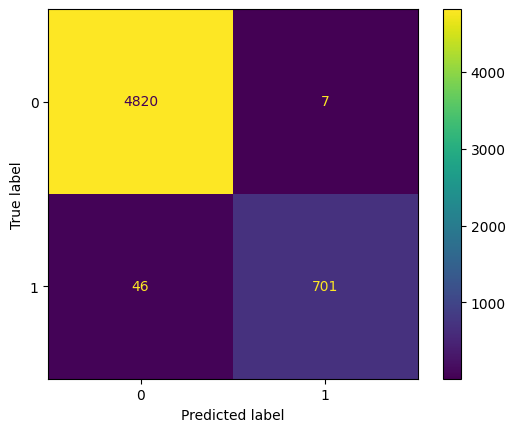

In [15]:
y_pred = model.pred(X)
acc = accuracy_score(y, y_pred)
print(f"Accuracy: {(np.sum(y==y_pred)/len(y))*100:.3f} %")
cm = confusion_matrix(y, y_pred, labels=[0, 1])
cm_display = ConfusionMatrixDisplay(cm, display_labels=[0, 1])
cm_display.plot()
plt.show()

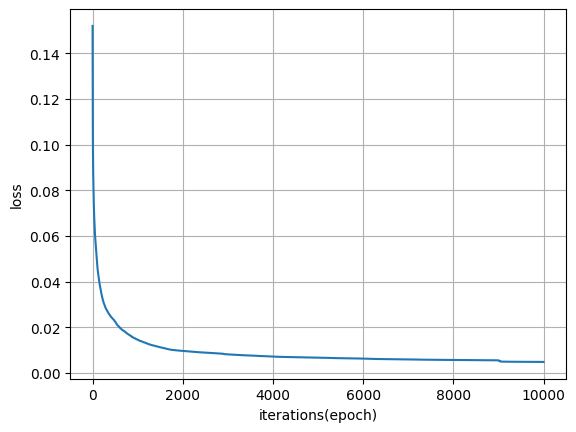

In [8]:
plt.plot(range(epoch), model.loss)

plt.grid()
plt.xlabel("iterations(epoch)")
plt.ylabel("loss")
 
plt.show()

In [9]:
# test1, test2 are [spam, ham]
test1 = "You are a winner U have been specially selected 2 receive £1000 cash or a 4* holiday (flights inc) speak to a live operator 2 claim 0871277810810"
test2 = "I just reached home. I go bathe first. But my sis using net tell u when she finishes k..."
test = np.array([test1, test2])

In [11]:
X_ = dataset.datatransform(data=test, new_data=True)
print("Naive Bayes Predict(1:spam, 0:ham):", model.pred(X_))

Naive Bayes Predict(1:spam, 0:ham): [1. 0.]
